<a href="https://colab.research.google.com/github/syarifabdulbaqi/VK_tekstur_syarifabdulbaqi/blob/main/texture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import glob

from skimage.color import rgb2gray
from skimage.feature import local_binary_pattern

In [ ]:
def load_image(arr):
    strr = "Dataset/*.jpg"
    for file in glob.glob(strr):
        img=np.asarray(plt.imread(file))
        arr.append(img)
    return arr

In [ ]:
def preprocessing(arr):
    arr_prep=[]
    for i in range(np.shape(arr)[0]):
        img=cv2.cvtColor(arr[i], cv2.COLOR_BGR2GRAY)
        arr_prep.append(img)
    return arr_prep

In [ ]:
def extractLBP(img):
    lbp = local_binary_pattern(img, 24,3, method="uniform")
    (hist, _) = np.histogram(lbp.ravel(),bins=np.arange(0, 27),range=(0, 26))
    hist = hist.astype("float")
    hist /= (hist.sum() + (1e-7))
    return lbp,hist

In [ ]:
def featureExtraction(arr):
    arr_feature=[]
    vector_feature=[]
    for i in range(np.shape(arr)[0]):
        lb,vektor = extractLBP(arr[i])
        arr_feature.append(lb)
        vector_feature.append(vektor)
    return arr_feature, vector_feature

In [ ]:
data=[]
data=load_image(data)

In [ ]:
dataPreprocessed = preprocessing(data)

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:2007: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape


In [ ]:
dataExtracted,vector = featureExtraction(dataPreprocessed)

Extraction Result


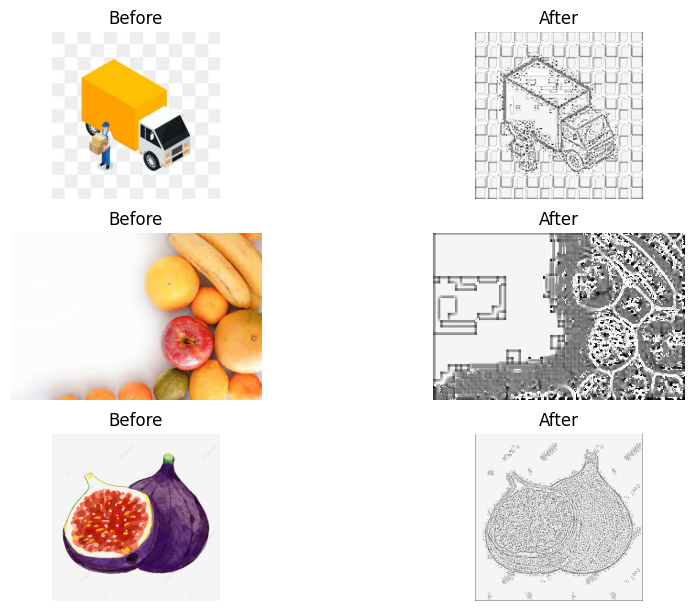

In [ ]:
print('Extraction Result')
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(4,2,1)
ax1.set_title('Before')
ax1.set_axis_off()
ax1.imshow(data[0])

ax2 = fig.add_subplot(4,2,2)
ax2.set_title('After')
ax2.set_axis_off()
ax2.imshow(dataExtracted[0],cmap=plt.cm.gray)

ax3 = fig.add_subplot(4,2,3)
ax3.set_title('Before')
ax3.set_axis_off()
ax3.imshow(data[1],)

ax4 = fig.add_subplot(4,2,4)
ax4.set_title('After')
ax4.set_axis_off()
ax4.imshow(dataExtracted[1],cmap=plt.cm.gray)

ax5 = fig.add_subplot(4,2,5)
ax5.set_title('Before')
ax5.set_axis_off()
ax5.imshow(data[2])

ax6 = fig.add_subplot(4,2,6)
ax6.set_title('After')
ax6.set_axis_off()
ax6.imshow(dataExtracted[2],cmap=plt.cm.gray)
plt.show()

In [ ]:
print("Vector of Image 1 :",vector[0])
print()
print("Vector of Image 2 :",vector[1])
print()
print("Vector of Image 3 :",vector[2])

Vector of Image 1 : [0.00990741 0.00729938 0.00436728 0.00252315 0.00180556 0.00185957
 0.00175926 0.00283179 0.00313272 0.00791667 0.00540895 0.0133642
 0.01266975 0.05416667 0.00528549 0.02853395 0.00354938 0.04666667
 0.00597222 0.01322531 0.00810957 0.02335648 0.02197531 0.01612654
 0.38722222 0.31096451]

Vector of Image 2 : [0.01317437 0.00610035 0.00761053 0.00645802 0.00679583 0.00814704
 0.00792846 0.01373075 0.01846001 0.02499752 0.03690015 0.06114257
 0.07777447 0.09045206 0.03495281 0.04258321 0.01510184 0.02942871
 0.00957774 0.00739195 0.00701441 0.00814704 0.00796821 0.00818679
 0.32886239 0.12111277]

Vector of Image 3 : [0.0330249  0.0186499  0.01027344 0.00568604 0.00370117 0.00306152
 0.00272461 0.00277832 0.00272949 0.00311035 0.00378174 0.00604004
 0.00915771 0.01190186 0.00377686 0.00935547 0.00303711 0.00990967
 0.00392578 0.00465088 0.00618652 0.00915039 0.01553467 0.02141113
 0.51081299 0.28562744]
